### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### Data Dictionary


| Variable          | Description                                    |
|-------------------|------------------------------------------------|
| Loan_ID           | Unique Loan ID                                 |
| Gender            | Male/ Female                                   |
| Married           | Applicant married (Y/N)                        |
| Dependents        | Number of dependents                           |
| Education         | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed     | Self employed (Y/N)                            |
| ApplicantIncome   | Applicant income                               |
| CoapplicantIncome | Coapplicant income                             |
| LoanAmount        | Loan amount in thousands                       |
| Loan_Amount_Term  | Term of loan in months                         |
| Credit_History    | credit history meets guidelines                |
| Property_Area     | Urban/ Semi Urban/ Rural                       |
| Loan_Status       | (Target) Loan approved (Y/N)                   |

### Importing required Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# import the functions to perform Chi-square tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

Loading data

In [4]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [ ]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].str.rstrip('+')

In [8]:
train_1=train.drop(['Loan_ID','Loan_Status'],axis=1)
test_1=test.drop('Loan_ID',axis=1)

In [9]:
data=pd.concat([train_1,test_1],axis=0,ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 84.4+ KB


In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.00,981.00,954.00,961.00,902.00
mean,5179.80,1601.92,142.51,342.20,0.84
std,5695.10,2718.77,77.42,65.10,0.37
min,0.00,0.00,9.00,6.00,0.00
25%,2875.00,0.00,100.00,360.00,1.00
50%,3800.00,1110.00,126.00,360.00,1.00
75%,5516.00,2365.00,162.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


Changing the datatypes of certain columns

In [11]:
data['Credit_History']=data['Credit_History'].astype('object')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('object')

In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.00,981.00,954.00
mean,5179.80,1601.92,142.51
std,5695.10,2718.77,77.42
min,0.00,0.00,9.00
25%,2875.00,0.00,100.00
50%,3800.00,1110.00,126.00
75%,5516.00,2365.00,162.00
max,81000.00,41667.00,700.00


### Univariate analysis

In [13]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_mean = data[x].mean()
    x_std = data[x].std()
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(Mean) : {round(x_mean, 3)}\n'
          f'{x.capitalize()}(Standard Deviation) : {round(x_std, 3)}\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Applicantincome Attribute:
Applicantincome(Mean) : 5179.795
Applicantincome(Standard Deviation) : 5695.105
Applicantincome(min) : 0
Q1                    : 2875.0
Q2(Median)            : 3800.0
Q3                    : 5516.0
Applicantincome(max) : 81000


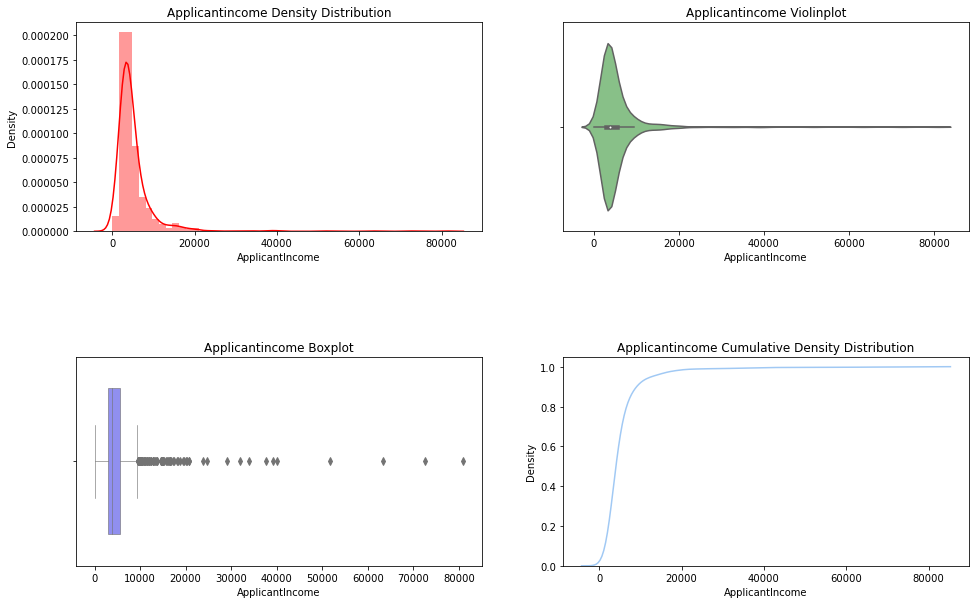

5 Point Summary of Coapplicantincome Attribute:
Coapplicantincome(Mean) : 1601.916
Coapplicantincome(Standard Deviation) : 2718.773
Coapplicantincome(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 1110.0
Q3                    : 2365.0
Coapplicantincome(max) : 41667.0


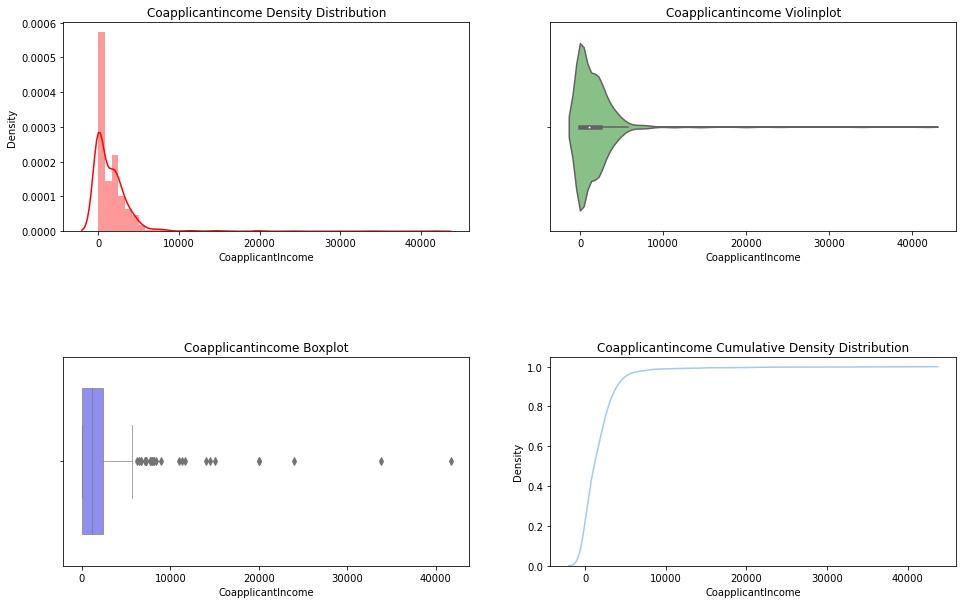

5 Point Summary of Loanamount Attribute:
Loanamount(Mean) : 142.512
Loanamount(Standard Deviation) : 77.422
Loanamount(min) : 9.0
Q1                    : 100.0
Q2(Median)            : 126.0
Q3                    : 162.0
Loanamount(max) : 700.0


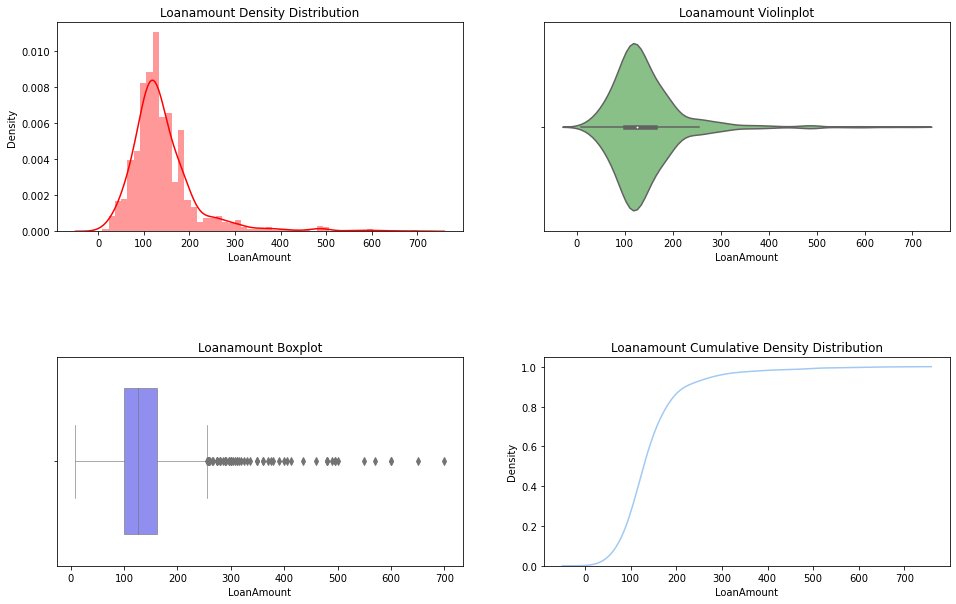

In [14]:
for i in data.describe():
    summary(i)

1 Applicant income observations:

* data is right skewed
* There are lot of outliers

2 Coapplicant income

* data is right skewed
* There are lot of outliers

3 Loan amount

* data is right skewed
* There are lot of outliers

## Outlier detection & Imputation

In [15]:
class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [16]:
# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
ApplicantIncome,84,8.56
CoapplicantIncome,26,2.65
Credit_History,0,0.00
Dependents,0,0.00
Education,0,0.00
Gender,0,0.00
LoanAmount,65,6.63
Loan_Amount_Term,0,0.00
Married,0,0.00
Property_Area,0,0.00


In [17]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = OutliersImputer().fit_transform(
    data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

## Exploratory Data Analysis

<AxesSubplot:>

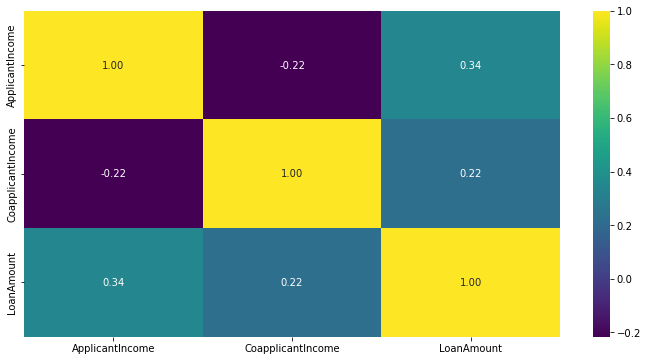

In [18]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

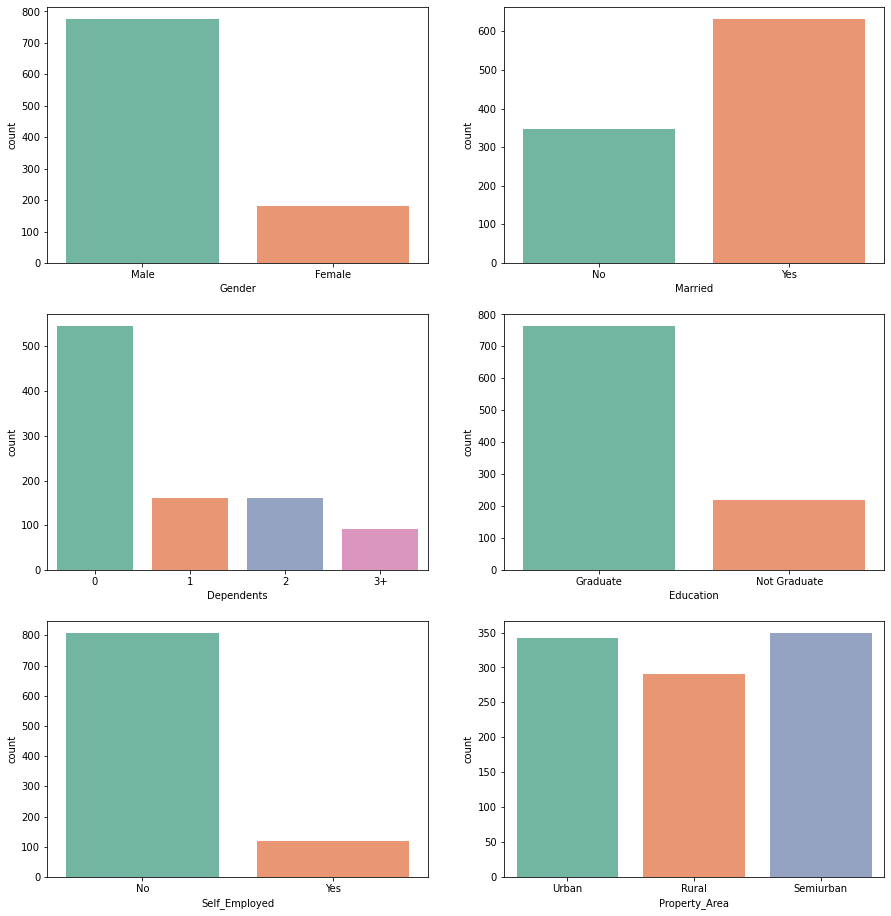

In [31]:
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(data['Gender'], ax=ax[0,0], palette='Set2')
_=sns.countplot(data['Married'], ax=ax[0,1], palette='Set2')
_=sns.countplot(data['Dependents'], ax=ax[1,0], palette='Set2')
_=sns.countplot(data['Education'], ax=ax[1,1], palette='Set2')
_=sns.countplot(data['Self_Employed'], ax=ax[2,0], palette='Set2')
_=sns.countplot(data['Property_Area'], ax=ax[2,1], palette='Set2')

### Target variable in train data

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

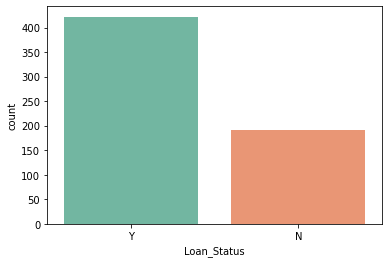

In [32]:
sns.countplot(train['Loan_Status'], palette='Set2')

<AxesSubplot:xlabel='Gender', ylabel='count'>

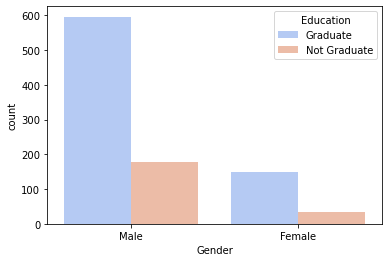

In [33]:
sns.countplot('Gender', hue = 'Education', data = data, palette = 'coolwarm')

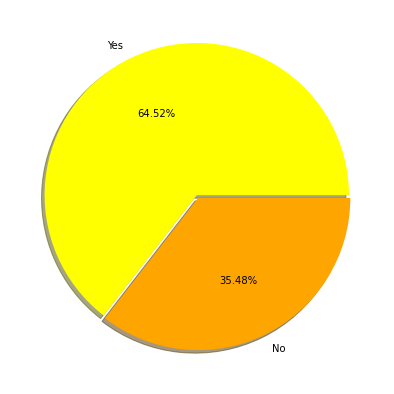

In [34]:
size = data['Married'].value_counts()
labels = ['Yes', 'No']
color = ['yellow', 'orange']
explode = [0.01, 0.01]

plt.figure(figsize = (7,7))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

### Looking for null values

In [19]:
data.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

### Imputing missing values

In [21]:
categorical=data.select_dtypes(include='object').columns
numerical=data.select_dtypes(exclude='object').columns

In [22]:
data[categorical] = data[categorical].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index))

### imputing with MICE imputer

In [23]:
imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                           initial_strategy='mean',
                           max_iter=10, random_state=0)
imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

In [24]:
data[numerical] = imp_num.fit_transform(data[numerical])
data[categorical] = imp_cat.fit_transform(data[categorical])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.00,0.00,0.00,0.00,0.00,5849.00,0.00,126.76,10.00,1.00,2.00
1,1.00,1.00,1.00,0.00,0.00,4583.00,1508.00,128.00,10.00,1.00,0.00
2,1.00,1.00,0.00,0.00,1.00,3000.00,0.00,66.00,10.00,1.00,2.00
3,1.00,1.00,0.00,1.00,0.00,2583.00,2358.00,120.00,10.00,1.00,2.00
4,1.00,0.00,0.00,0.00,0.00,6000.00,0.00,141.00,10.00,1.00,2.00


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    float64
 1   Married            981 non-null    float64
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    float64
 4   Self_Employed      981 non-null    float64
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    float64
dtypes: float64(11)
memory usage: 84.4 KB


In [25]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [39]:
data[categorical]=data[categorical].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    object 
 9   Credit_History     981 non-null    object 
 10  Property_Area      981 non-null    object 
dtypes: float64(3), object(8)
memory usage: 84.4+ KB


In [26]:
train.shape

(614, 13)

### Splitting train and test data

In [ ]:
train_pre=data.iloc[0:614,:]
test_pre=data.iloc[614:,:]

In [48]:
target=train['Loan_Status']

In [46]:
train_pre.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
609,0.00,0.00,0.00,0.00,0.00,2900.00,0.00,71.00,10.00,1.00,0.00
610,1.00,1.00,3.00,0.00,0.00,4106.00,0.00,40.00,6.00,1.00,0.00
611,1.00,1.00,1.00,0.00,0.00,8072.00,240.00,253.00,10.00,1.00,2.00
612,1.00,1.00,2.00,0.00,0.00,7583.00,0.00,187.00,10.00,1.00,2.00
613,0.00,0.00,0.00,0.00,1.00,4583.00,0.00,133.00,10.00,0.00,1.00


In [47]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
dtypes: float64(3), object(8)
memory usage: 52.9+ KB


### splitting train data into train and validation

In [49]:
X_train, X_val, y_train, y_val = train_test_split(
    train_pre, target, test_size=0.3, random_state=42)

#### using LazyClassifier to know  top performing  alogarthims 

In [64]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_val, y_train, y_val)

 86%|██████████████████████████████████████████████████████████████████████▋           | 25/29 [00:01<00:00, 18.15it/s]

[16:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.56it/s]


In [65]:
model.sort_values('Accuracy', ascending = False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.80,0.74,None,0.79,0.03
LinearSVC,0.79,0.71,None,0.76,0.04
LinearDiscriminantAnalysis,0.79,0.71,None,0.76,0.03
BernoulliNB,0.79,0.71,None,0.76,0.01
CalibratedClassifierCV,0.79,0.71,None,0.76,0.08
RidgeClassifier,0.79,0.71,None,0.76,0.03
LogisticRegression,0.79,0.71,None,0.76,0.04
NuSVC,0.78,0.70,None,0.76,0.05
RidgeClassifierCV,0.78,0.70,None,0.76,0.05


selecting top models for fitting induvidually on data

In [87]:
models = [['PassiveAggressiveClassifier ', PassiveAggressiveClassifier()],
        ['SGDClassifier',SGDClassifier()],
        ['LinearSVC', LinearSVC()],
        ['SVC ', SVC()],
        ['LinearDiscriminantAnalysis',LinearDiscriminantAnalysis()],
        ['BernoulliNB', BernoulliNB()],
        ['CalibratedClassifierCV', CalibratedClassifierCV()],
        ['RidgeClassifier ', RidgeClassifier()],
        ['LogisticRegression', LogisticRegression()],
        ['AdaBoostClassifier ', AdaBoostClassifier()],
        ['GradientBoostingClassifier ', GradientBoostingClassifier()],  
        ['RandomForestClassifier ', RandomForestClassifier()]]

In [89]:
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    pd.DataFrame()
    print(name,accuracy_score(y_val, prediction))

PassiveAggressiveClassifier  0.6486486486486487
SGDClassifier 0.6486486486486487
LinearSVC 0.6486486486486487
SVC  0.6486486486486487
LinearDiscriminantAnalysis 0.7837837837837838
BernoulliNB 0.7837837837837838
CalibratedClassifierCV 0.6486486486486487
RidgeClassifier  0.7837837837837838
LogisticRegression 0.7837837837837838
AdaBoostClassifier  0.7621621621621621
GradientBoostingClassifier  0.7783783783783784
RandomForestClassifier  0.772972972972973


### hyperparameter tuning for top models 

In [94]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },
    'BernoulliNB' : {
        'model' : BernoulliNB(),
        'param' : {
            'alpha' : [0,1]
        }
    },
    'AdaBoostClassifier' : {
        'model' : AdaBoostClassifier(),
        'param' : {
            'n_estimators' : [100, 300, 500, 700, 1000, 2100],
            'learning_rate' : [0.1, 0.3, 0.5, 0.7]
        }
    },
    'classifier = LogisticRegression(max_iter=300, solver='liblinear')
classifier.fit(train_pre, y_train)' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'LinearDiscriminantAnalysis' : {
        'model' : LinearDiscriminantAnalysis(),
        'param' : {
            'solver':['svd', 'lsqr', 'eigen']
        }
    }
}

In [95]:
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 10,
                            verbose=3, n_jobs=-1)
    rs.fit(X_train, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits


### finding out best params

In [96]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
0,LogisticRegression,0.82,"LogisticRegression(C=0.9, max_iter=2100, solve..."
1,BernoulliNB,0.82,BernoulliNB(alpha=0)
3,RandomForestClassifier,0.82,"(DecisionTreeClassifier(max_depth=3, max_featu..."
4,LinearDiscriminantAnalysis,0.82,LinearDiscriminantAnalysis()
2,AdaBoostClassifier,0.82,"(DecisionTreeClassifier(max_depth=1, random_st..."


Choosing one best alagorthin

In [247]:
final['estimator'].iloc[0]

LogisticRegression(C=0.9, max_iter=2100, solver='liblinear')

### fitting on actual train data 

In [102]:
classifier = RandomForestClassifier(max_depth=3, min_samples_split=6, n_estimators=300)
classifier.fit(train_pre, target)

RandomForestClassifier(max_depth=3, min_samples_split=6, n_estimators=300)

predict LoanStatus for test data

In [103]:
pred = classifier.predict(test_pre)

submitting the results and checking the accuracy

In [105]:
test_df = pd.read_csv('test_lAUu6dG.csv')
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_ID'] = test_df['Loan_ID']

In [106]:
submission['Loan_Status'] = pred
submission.to_csv('sample_submission_full.csv', index=False)

### Accuracy is 77.77%

As we have taken all columns for prediction ,now let us do some preprossing for selecting the important variables.

performing chi-square test for categorical vs categorical variables and Mannwhitneyutest(Wilcoxon test) for categorical vs numerical variables 

### chi-square

In [186]:
for cat in train_pre[categorical]:
    quality_array = pd.crosstab(index= train_pre[cat],columns=train['Loan_Status'])
    chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)
    stats.chi2_contingency(quality_array)
    

    
    print('Categorical Variable: {} \nChi-statistic: {} \nP-value: {} \nDegrees of freedom: {}' .format(cat,chi_sq_Stat, p_value,deg_freedom))
    print('                  ')
    if p_value < 0.05:
        print('Variable is important')
    else:
        print('Variable Not important')
    print('                  ')
    print('=======================================================================')

Categorical Variable: Gender 
Chi-statistic: 0.06843064062357448 
P-value: 0.7936356201282725 
Degrees of freedom: 1
                  
Variable Not important
                  
Categorical Variable: Married 
Chi-statistic: 4.4765380890374225 
P-value: 0.03436325983591257 
Degrees of freedom: 1
                  
Variable is important
                  
Categorical Variable: Dependents 
Chi-statistic: 2.909416150697468 
P-value: 0.40580331303768846 
Degrees of freedom: 3
                  
Variable Not important
                  
Categorical Variable: Education 
Chi-statistic: 4.091490413303621 
P-value: 0.04309962129357355 
Degrees of freedom: 1
                  
Variable is important
                  
Categorical Variable: Self_Employed 
Chi-statistic: 0.0013148242700656973 
P-value: 0.9710746411403309 
Degrees of freedom: 1
                  
Variable Not important
                  
Categorical Variable: Loan_Amount_Term 
Chi-statistic: 13.774252104832453 
P-value: 0.13058516348

### shapiro and Mannwhitneyutest

### checking with coapplicant income

In [198]:
yes=train_pre[train_pre["Loan_Status"]=='Y']['CoapplicantIncome']
no=train_pre[train_pre["Loan_Status"]=='N']['CoapplicantIncome']

Shapiro test for normality check

In [199]:
#normality test-->shapiro
zstat,pvalue=stats.shapiro(yes)
print('Zstat:',zstat,'P-value:',pvalue)
zstat,pvalue=stats.shapiro(no)
print('Zstat:',zstat,'P-value:',pvalue)

Zstat: 0.8468347191810608 P-value: 7.869486155099798e-20
Zstat: 0.8078885078430176 P-value: 1.2386286454509933e-14


### Null hypothesis = normally disturbuted
### Alternative hypothesis = not normally disturbuted

##### since p-value is less than signaficance level(0.05) we reject the null hypothesis and accept the alternative. 

use  non-parametric test  

## Mannwhitneyutest(Wilcoxon test)

#### Null hypothesis = both classes have same meadian disturbution
#### Alternative hypothesis = both classes have different meadian disturbution

In [191]:
test_stat, p_value = stats.mannwhitneyu(yes,no,alternative = 'two-sided')
# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 42981.0
p-value: 0.20464672422587227


p value is greater than significant level 0.05 we accept the null hypothesis 

### checking with ApplicantIncome

In [194]:
yes=train_pre[train_pre["Loan_Status"]=='Y']['ApplicantIncome']
no=train_pre[train_pre["Loan_Status"]=='N']['ApplicantIncome']

In [195]:
test_stat, p_value = stats.mannwhitneyu(yes,no,alternative = 'two-sided')
# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 40251.5
p-value: 0.8984202061730892


### checking with LoanAmount

In [196]:
yes=train_pre[train_pre["Loan_Status"]=='Y']['LoanAmount']
no=train_pre[train_pre["Loan_Status"]=='N']['LoanAmount']

In [197]:
test_stat, p_value = stats.mannwhitneyu(yes,no,alternative = 'two-sided')
# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 39808.0
p-value: 0.7297093094111313


#### observation
all the three variables are not having importance for predictint the loan status variable

### Now consider only the categorical variables for prediction 'Married','Education','Credit_History','Property_Area' for predicting 'Loanstatus'.

In [229]:
train_hyp=train_pre[['Married','Education','Credit_History','Property_Area']]
test_hyp=test_pre[['Married','Education','Credit_History','Property_Area']]

In [234]:
train_hyp=pd.get_dummies(train_hyp,drop_first=True) 
test_hyp=pd.get_dummies(test_hyp,drop_first=True)

In [235]:
train_hyp

,Married_1.0,Education_1.0,Credit_History_1.0,Property_Area_1.0,Property_Area_2.0
0,0,0,1,0,1
1,1,0,1,0,0
2,1,0,1,0,1
3,1,1,1,0,1
4,0,0,1,0,1
...,...,...,...,...,...
609,0,0,1,0,0
610,1,0,1,0,0
611,1,0,1,0,1
612,1,0,1,0,1


In [236]:
classifier = RandomForestClassifier(max_depth=3, min_samples_split=6, n_estimators=300)
classifier.fit(train_hyp, target)

RandomForestClassifier(max_depth=3, min_samples_split=6, n_estimators=300)

In [241]:
pred = classifier.predict(test_hyp)

In [242]:
test_df = pd.read_csv('test_lAUu6dG.csv')
submission1 = pd.read_csv('sample_submission_49d68Cx.csv')

submission1['Loan_ID'] = test_df['Loan_ID']

In [243]:
submission1['Loan_Status'] = pred
submission1.to_csv('sample_submission_hyp.csv', index=False)

## Accuracy is 77.77%

as we reduced variables also we are getting the same accuracy compared to whole dataset

## _______________________END___________________